<a href="https://colab.research.google.com/github/mike-scally/ET5003/blob/main/ET5003_KaggleCompetition_MikeScally_9312951.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [152]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [153]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
#@markdown ---

In [154]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Draft" #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [155]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [156]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [158]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [159]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale

In [160]:
!pip install gpy

In [161]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [162]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Training & Test Data

In [163]:
# split data into training and test
#from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

### Train dataset

In [164]:
#Load the dataset
from google.colab import drive
drive.mount('/content/drive')

# Path, copy the path from your Drive
Path = '/content/drive/My Drive/Colab Notebooks/data/house-prices/'

training_file = Path + 'house_train.csv'
testing_file = Path + 'house_test.csv'
cost_file = Path + 'true_price.csv'

# Load training data
dftrain = pd.read_csv(training_file)

# test data
dftest = pd.read_csv(testing_file)

# test prices
dfcost = pd.read_csv(cost_file)

print("Train Data Shape:", dftrain.shape)
print("Test Data Shape:", dftest.shape)
#print("True Data Shape:", dfcost.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Data Shape: (2982, 17)
Test Data Shape: (500, 16)


In [165]:
# show first data frame rows 
dftrain.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
0,996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
1,999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
2,999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN
3,9102986,Balbriggan,NaN,NaN,NaN,Dublin,"Glenveagh Taylor Hill, Balbriggan\n\r\n*Ideal ...",prod,NaN,None,53.608167,-6.210914,30.0,NaN,new_development_parent,NaN,NaN
4,9106028,Foxrock,NaN,NaN,NaN,Dublin,*New phase launching this weekend Sat &amp; Su...,prod,NaN,None,53.262531,-6.181527,8.0,NaN,new_development_parent,NaN,NaN


In [166]:
# Generate descriptive statistics
dftrain.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,price,surface
count,2.982000e+03,2931.000000,2931.000000,2982.000000,2982.000000,59.000000,2.892000e+03,2431.000000
mean,1.224065e+07,1.998635,2.979188,53.355991,-6.257175,7.440678,5.323536e+05,318.851787
std,5.793037e+05,1.291875,1.468408,0.086748,0.141906,8.937081,5.678148e+05,4389.423136
min,9.968870e+05,0.000000,0.000000,51.458439,-6.521183,0.000000,1.999500e+04,3.400000
25%,1.226813e+07,1.000000,2.000000,53.298929,-6.314064,2.000000,2.800000e+05,74.100000
50%,1.237758e+07,2.000000,3.000000,53.345497,-6.252254,3.000000,3.800000e+05,100.000000
75%,1.240294e+07,3.000000,4.000000,53.388845,-6.196049,8.000000,5.750000e+05,142.000000
max,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,36.000000,9.995000e+06,182108.539008


### Test dataset

In [167]:
# show first data frame rows 
dftest.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface
0,12373510,Skerries,2.0,4.0,G,Dublin,"It's all in the name ""Island View"";. Truly won...",prod,"Parking,Alarm,Oil Fired Central Heating",Breath-taking panoramic views radiate from thi...,53.566881,-6.101148,NaN,sale,bungalow,142.0
1,12422623,Lucan,2.0,3.0,C1,Dublin,REA McDonald - Lucan' s longest established es...,prod,NaN,Gas fired central heating.\nDouble glazed wind...,53.362992,-6.452909,NaN,sale,terraced,114.0
2,12377408,Swords,3.0,4.0,B3,Dublin,REA Grimes are proud to present to the market ...,prod,NaN,Pristine condition throughout\nHighly sought-a...,53.454198,-6.262964,NaN,sale,semi-detached,172.0
3,12420093,Lucan,4.0,3.0,A3,Dublin,"REA McDonald, Lucan' s longest established est...",prod,NaN,A-rated home within a short walk of Lucan Vill...,53.354402,-6.458647,NaN,sale,semi-detached,132.4
4,12417338,Clondalkin,1.0,3.0,E2,Dublin,"Hibernian Auctioneers are delighted to bring, ...",prod,"Parking,Gas Fired Central Heating,Wired for Ca...",Mature Location \nGas Heating \nClose to Ameni...,53.336530,-6.393587,NaN,sale,semi-detached,88.0


In [168]:
# Generate descriptive statistics
dftest.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,surface
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,0.0,500.000000
mean,1.231695e+07,1.994000,2.930000,53.356034,-6.247842,NaN,156.007671
std,1.485832e+05,1.106532,1.191612,0.081905,0.088552,NaN,344.497362
min,1.130615e+07,0.000000,0.000000,53.221348,-6.496987,NaN,33.500000
25%,1.228617e+07,1.000000,2.000000,53.297373,-6.296404,NaN,72.375000
50%,1.237964e+07,2.000000,3.000000,53.339547,-6.243572,NaN,98.000000
75%,1.240544e+07,3.000000,4.000000,53.381650,-6.185055,NaN,138.935000
max,1.242809e+07,8.000000,7.000000,53.619775,-6.064874,NaN,5746.536120


### Expected Cost dataset

In [169]:
# Generate descriptive statistics
#dfcost.describe()

#Pre-processing of the data

In [170]:
#Count records where bedrooms or bathrooms are zero
print("\nNumber of records with zero beds:", (dftrain['beds'] == 0).sum())
print("Number of records with zero bathrooms:", (dftrain['bathrooms'] == 0).sum())

#Remove bathrooms and beds that are blank, and also blank prices as we cannot train on a predicted blank value
dftrain = dftrain.dropna(subset=['bathrooms'])
dftrain = dftrain.dropna(subset=['price'])

#Remove records where bedrooms or bathrooms are zero
dftrain = dftrain[dftrain['beds'] > 0]
dftrain = dftrain[dftrain['bathrooms'] > 0]

#Check for empty values in columns
print(dftrain.isna().sum())


Number of records with zero beds: 56
Number of records with zero bathrooms: 71
ad_id                    0
area                     0
bathrooms                0
beds                     0
ber_classification     560
county                   0
description_block        0
environment              0
facility              1878
features                 0
latitude                 0
longitude                0
no_of_units           2821
price                    0
property_category        0
property_type            0
surface                479
dtype: int64


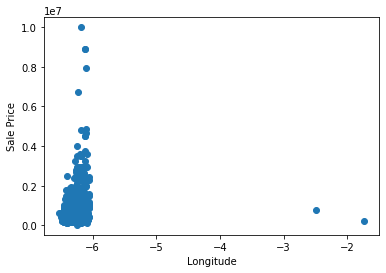

In [171]:
#Lets have a look at longitude values and see if there are outliers
plt.scatter(x=dftrain['longitude'], y=dftrain['price'])
plt.ylabel('Sale Price')
plt.xlabel('Longitude')
plt.show()

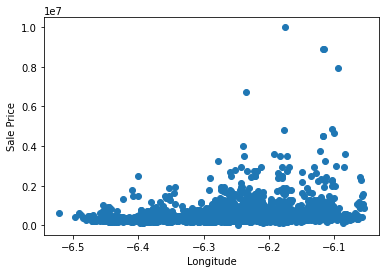

In [172]:
#Remove outliers - where longitude > -4
dftrain = dftrain[dftrain['longitude'] < -4]
plt.scatter(x=dftrain['longitude'], y=dftrain['price'])
plt.ylabel('Sale Price')
plt.xlabel('Longitude')
plt.show()

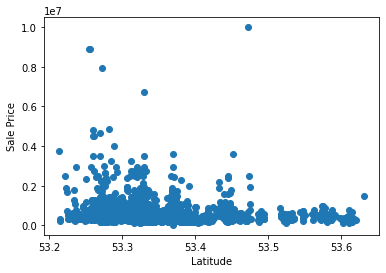

In [173]:
#Lets have a look at the latitude values
plt.scatter(x=dftrain['latitude'], y=dftrain['price'])
plt.ylabel('Sale Price')
plt.xlabel('Latitude')
plt.show()

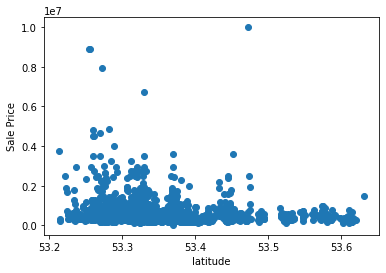

In [174]:
#Remove outliers where latitude < 53
dftrain = dftrain[dftrain['latitude'] > 53]
plt.scatter(x=dftrain['latitude'], y=dftrain['price'])
plt.ylabel('Sale Price')
plt.xlabel('latitude')
plt.show()

In [175]:
# Specify the features we will use to train the model

featrain = ['beds','bathrooms','latitude', 'longitude', 'price']
# dropna: remove missing values
df_subset_train = dftrain[featrain].dropna(axis=0)

featest = ['beds','bathrooms','latitude', 'longitude']
df_subset_test  =  dftest[featest].dropna(axis=0)

# cost
df_subset_cost = dfcost[dfcost.index.isin(df_subset_test.index)]

print(df_subset_train.shape)
print(df_subset_test.shape)
#print(df_subset_cost.shape)

(2826, 5)
(500, 4)


In [176]:
#Check that all our nan values are now removed
print('Number of nan in df_subset_train dataset: ',df_subset_train.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0


In [177]:
# train set, input columns
Xs_full_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_full_train = df_subset_train.iloc[:,-1].values

# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 

print("Xs_train shape:", Xs_full_train.shape)
print("ys_train shape:", ys_full_train.shape)

print("Xs_test shape:", Xs_test.shape)
#print("y_test shape:", y_test.shape)

Xs_train shape: (2826, 4)
ys_train shape: (2826,)
Xs_test shape: (500, 4)


In [178]:
#We split the training dataset into training and validation, so we can validate/evaluate the model on the training data
Xs_train,Xs_val,ys_train,ys_val = train_test_split(Xs_full_train, ys_full_train, test_size=0.2)

print("X train shape:", Xs_train.shape)
print("y train shape:", ys_train.shape)
print("X validation shape:", Xs_val.shape)
print("y validation shape:", ys_val.shape)

print("X test shape:", Xs_test.shape)

X train shape: (2260, 4)
y train shape: (2260,)
X validation shape: (566, 4)
y validation shape: (566,)
X test shape: (500, 4)


In [179]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

Xss_val = np.hstack([Xs_val,Xs_val[:,[2]]**2])
Xn_val = xscaler.transform(Xss_val)

ylog = np.log(ys_train.reshape(-1, 1).astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog).reshape(-1,)

#We don't want to scale or transform our validation true values
yn_val = ys_val

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

In [ ]:
# your code here

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [ ]:
# your code here

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

Reference Document:

https://pymc3-testing.readthedocs.io/en/rtd-docs/notebooks/bayesian_neural_network_opvi-advi.html

In [180]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])
floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=1,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=1,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output)

In [181]:
# this can be slow because there are many parameters

# some parameters
par1 = 25  # start with 100, then use 1000+
par2 = 250 # start with 1000, then use 10000+

# neural network
with neural_network:
    posterior = pm.sample(par1,tune=par2,chains=1)

Only 25 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w_0, w_1]


Sampling 1 chain for 250 tune and 25 draw iterations (250 + 25 draws total) took 263 seconds.


In [182]:
# we can do instead an approximated inference
param3 = 1000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.01    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 4,080.6


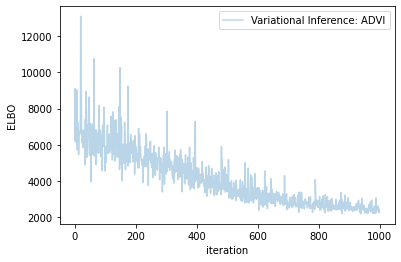

In [183]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [184]:
# draw samples from variational posterior
D = 300
posterior = approx.sample(draws=D)

###Evaluate model on validation data set

In [185]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_val.shape[0],1)), Xn_val])

y_val_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_val_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_val_pred = np.array(y_val_pred).mean(axis=0)

In [186]:
#We need to do the inverse transformation and scaling that was carried out on the y values at the start
y_val_pred_final = np.exp(yscaler.inverse_transform(y_val_pred))

In [187]:
print("MAE = ",(np.mean(abs(y_val_pred_final - yn_val))))
print("MAPE = ",(np.mean(abs(y_val_pred_final - yn_val) / yn_val)))

MAE =  170014.62745122093
MAPE =  0.25548568367193897


###Predict new y values for test data

In [188]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_test.shape[0],1)), Xn_test])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)

In [189]:
y_pred_final = np.exp(yscaler.inverse_transform(y_pred))

In [190]:
y_test = df_subset_cost.Expected.values
print("MAE = ",(np.mean(abs(y_pred_final - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_final - y_test) / y_test)))

MAE =  197749.2436385995
MAPE =  0.26970977963960663


# SUMMARY

Your summary here.